In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.layers import BatchNormalization


In [ ]:
data = pd.read_csv('Physical Activity.csv')

In [ ]:
data.shape

(2864056, 33)

In [ ]:
data = data[data['activityID'] != 'transient activities']

In [ ]:
data.drop(columns=['PeopleId'],inplace=True)

In [ ]:
null_values = data.isnull().sum()


In [ ]:
data.dropna(inplace=True)

In [ ]:
null_values = data.isnull().sum()


In [ ]:
y=data['activityID']
#data.drop(columns=['activityID'],inplace=True)

In [ ]:
print(y.shape)
print(data.shape)

(1936481,)
(1936481, 32)


<h1> Model Building</h1>

In [ ]:
x = data.drop('activityID', axis=1)  # Features (replace 'activityID' with your target variable name)
y = data['activityID']

In [ ]:
y.head()

,activityID
2928,lying
2929,lying
2930,lying
2931,lying
2932,lying


In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
y = to_categorical(y,num_classes=12)

In [ ]:
x_dev, x_test, y_dev, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(x_dev, y_dev, test_size=0.3, random_state=42)

In [ ]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_val = scaler.transform(x_val)
x_test = scaler.transform(x_test)

<h1> Neural Network </h1>

In [ ]:
batch_size = [16,32]
batch_size_adam_models = []
batch_size_adam_accuracy = []
batch_size_adam_history = []

batch_size_sgd_models = []
batch_size_sgd_accuracy = []
batch_size_sgd_history = []

In [ ]:
for batch in batch_size:
 model_normal = Sequential()
 model_normal.add(Dense(32, activation='relu'))
 model_normal.add(BatchNormalization())
 model_normal.add(Dense(32, activation='relu'))
 model_normal.add(BatchNormalization())
 model_normal.add(Dense(64, activation='relu'))
 model_normal.add(BatchNormalization())
 model_normal.add(Dense(12, activation='softmax'))
 model_normal.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
 model = model_normal.fit(x_train, y_train,validation_data=(x_val,y_val), epochs=20, batch_size=batch)
 batch_size_adam_models.append(model_normal)
 batch_size_adam_accuracy.append(model.history['val_accuracy'][-1])
 batch_size_adam_history.append(model)

Epoch 1/20
59305/59305 ━━━━━━━━━━━━━━━━━━━━ 176s 3ms/step - accuracy: 0.8465 - loss: 0.4647 - val_accuracy: 0.9642 - val_loss: 0.1070
Epoch 2/20
59305/59305 ━━━━━━━━━━━━━━━━━━━━ 163s 3ms/step - accuracy: 0.9383 - loss: 0.1799 - val_accuracy: 0.9748 - val_loss: 0.0753
Epoch 3/20
59305/59305 ━━━━━━━━━━━━━━━━━━━━ 163s 3ms/step - accuracy: 0.9490 - loss: 0.1466 - val_accuracy: 0.9783 - val_loss: 0.0636
Epoch 4/20
59305/59305 ━━━━━━━━━━━━━━━━━━━━ 201s 3ms/step - accuracy: 0.9553 - loss: 0.1297 - val_accuracy: 0.9815 - val_loss: 0.0542
Epoch 5/20
59305/59305 ━━━━━━━━━━━━━━━━━━━━ 167s 3ms/step - accuracy: 0.9582 - loss: 0.1202 - val_accuracy: 0.9827 - val_loss: 0.0490
Epoch 6/20
59305/59305 ━━━━━━━━━━━━━━━━━━━━ 198s 3ms/step - accuracy: 0.9607 - loss: 0.1136 - val_accuracy: 0.9839 - val_loss: 0.0494
Epoch 7/20
59305/59305 ━━━━━━━━━━━━━━━━━━━━ 200s 3ms/step - accuracy: 0.9620 - loss: 0.1091 - val_accuracy: 0.9838 - val_loss: 0.0457
Epoch 8/20
59305/59305 ━━━━━━━━━━━━━━━━━━━━ 202s 3ms/step - ac

In [ ]:
for batch in batch_size:
 model_normal = Sequential()
 model_normal.add(Dense(32, activation='relu'))
 model_normal.add(BatchNormalization())
 model_normal.add(Dense(32, activation='relu'))
 model_normal.add(BatchNormalization())
 model_normal.add(Dense(64, activation='relu'))
 model_normal.add(BatchNormalization())
 model_normal.add(Dense(12, activation='softmax'))
 model_normal.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=['accuracy'])
 model = model_normal.fit(x_train, y_train,validation_data=(x_val,y_val), epochs=20, batch_size=batch)
 batch_size_sgd_models.append(model_normal)
 batch_size_sgd_accuracy.append(model.history['val_accuracy'][-1])
 batch_size_sgd_history.append(model)

Epoch 1/20
59305/59305 ━━━━━━━━━━━━━━━━━━━━ 148s 2ms/step - accuracy: 0.8319 - loss: 0.5134 - val_accuracy: 0.9536 - val_loss: 0.1376
Epoch 2/20
59305/59305 ━━━━━━━━━━━━━━━━━━━━ 203s 2ms/step - accuracy: 0.9241 - loss: 0.2244 - val_accuracy: 0.9667 - val_loss: 0.0994
Epoch 3/20
59305/59305 ━━━━━━━━━━━━━━━━━━━━ 198s 2ms/step - accuracy: 0.9389 - loss: 0.1799 - val_accuracy: 0.9716 - val_loss: 0.0839
Epoch 4/20
59305/59305 ━━━━━━━━━━━━━━━━━━━━ 207s 3ms/step - accuracy: 0.9463 - loss: 0.1568 - val_accuracy: 0.9774 - val_loss: 0.0660
Epoch 5/20
59305/59305 ━━━━━━━━━━━━━━━━━━━━ 149s 3ms/step - accuracy: 0.9519 - loss: 0.1397 - val_accuracy: 0.9797 - val_loss: 0.0586
Epoch 6/20
59305/59305 ━━━━━━━━━━━━━━━━━━━━ 198s 2ms/step - accuracy: 0.9549 - loss: 0.1290 - val_accuracy: 0.9806 - val_loss: 0.0569
Epoch 7/20
59305/59305 ━━━━━━━━━━━━━━━━━━━━ 202s 2ms/step - accuracy: 0.9587 - loss: 0.1201 - val_accuracy: 0.9818 - val_loss: 0.0519
Epoch 8/20
59305/59305 ━━━━━━━━━━━━━━━━━━━━ 205s 3ms/step - ac

In [ ]:
adam_index = np.argmax(batch_size_adam_accuracy)
best_adam_model = batch_size_adam_models[adam_index]
sgd_index = np.argmax(batch_size_sgd_accuracy)
best_sgd_model = batch_size_sgd_models[sgd_index]

if batch_size_adam_accuracy[adam_index] > batch_size_sgd_accuracy[sgd_index]:
  best_model = best_adam_model
else:
  best_model = best_sgd_model

In [ ]:
best_model

<Sequential name=sequential_2, built=True>

18155/18155 ━━━━━━━━━━━━━━━━━━━━ 25s 1ms/step
Test Set Accuracy of the best model is : 0.9938

Confusion Matrix:



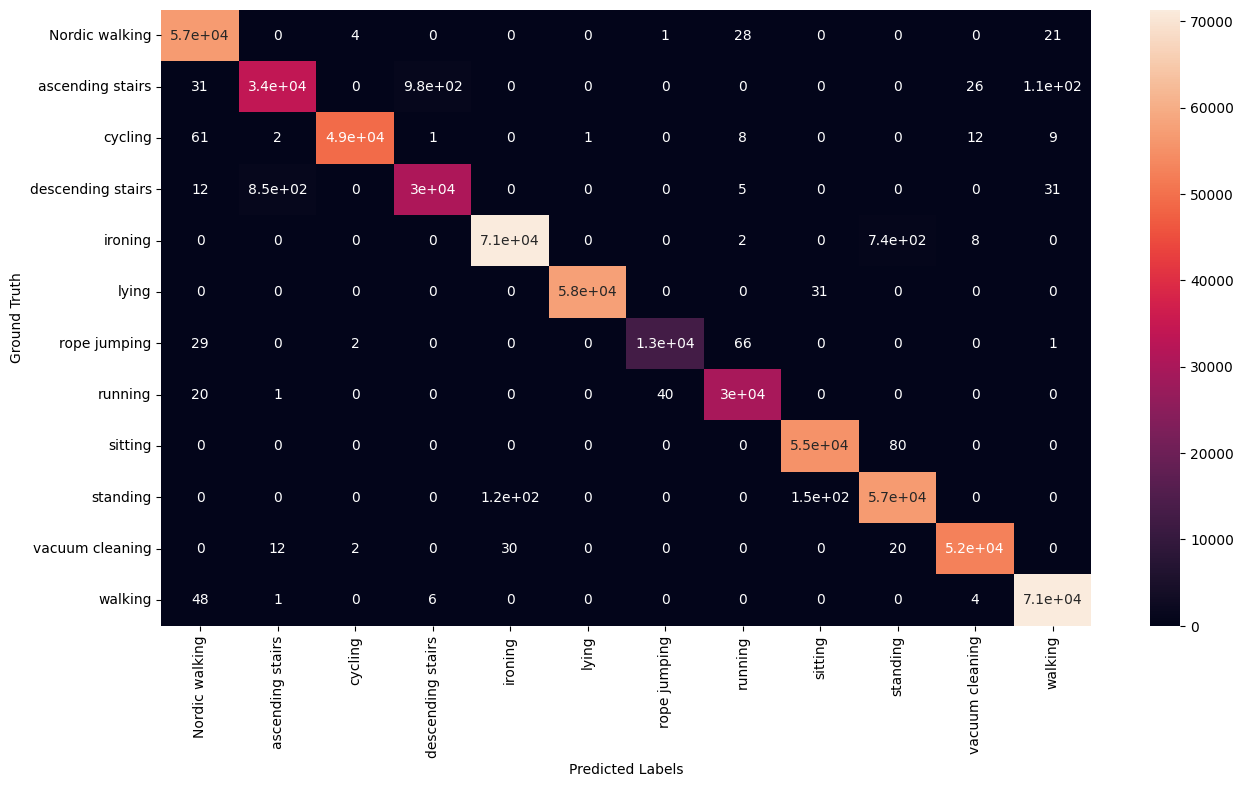


Classification Report:

              precision    recall  f1-score   support

           0     0.9965    0.9990    0.9978     56797
           1     0.9751    0.9674    0.9712     35114
           2     0.9998    0.9981    0.9990     49337
           3     0.9685    0.9712    0.9699     31292
           4     0.9980    0.9896    0.9938     71903
           5     1.0000    0.9995    0.9997     57657
           6     0.9968    0.9924    0.9946     12901
           7     0.9963    0.9979    0.9971     29639
           8     0.9967    0.9986    0.9976     55505
           9     0.9855    0.9953    0.9904     56900
          10     0.9990    0.9988    0.9989     52502
          11     0.9977    0.9992    0.9984     71398

    accuracy                         0.9938    580945
   macro avg     0.9925    0.9923    0.9924    580945
weighted avg     0.9938    0.9938    0.9938    580945



In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import numpy as np


y_test_pred_prob = best_model.predict(x_test)
y_test_pred = np.argmax(y_test_pred_prob, axis=1)
y_test_actual = np.argmax(y_test, axis=1)


accuracy = accuracy_score(y_test_actual, y_test_pred)
print(f"Test Set Accuracy of the best model is : {accuracy:.4f}")


cm = confusion_matrix(y_test_actual, y_test_pred)
print("\nConfusion Matrix:\n")
y_num = np.argmax(y, axis=1)
y_labels = label_encoder.inverse_transform(y_num)
class_names = np.unique(y_labels)
plt.figure(figsize=(15, 8))
sns.heatmap(cm, annot=True, xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('Ground Truth')
plt.show()



print("\nClassification Report:\n")
print(classification_report(y_test_actual, y_test_pred,digits=4))
